In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
from scipy import stats
from numpy.random import randn
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%matplotlib inline

In [3]:
#Rug/Carpet plot
ds = randn(25)


(0, 1)

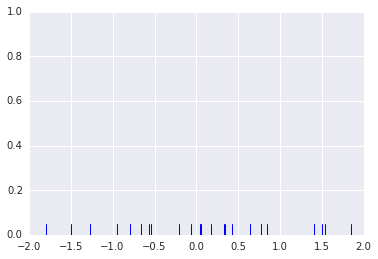

In [8]:
sns.rugplot(ds)
plt.ylim(0,1)



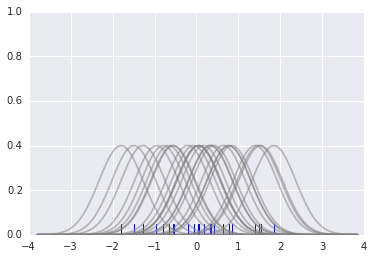

In [15]:
sns.rugplot(ds)

x_min=ds.min()-2
x_max=ds.max()+2

x_axis=np.linspace(x_min,x_max,100)

bandwidth=((4*ds.std()**5)/(3*len(ds)))**0.2

kernel_list = []

for data_point in ds:
    #Create a kernel for each point & append to kernel list
    kernel=stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel/kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    
    plt.ylim(0,1)
    

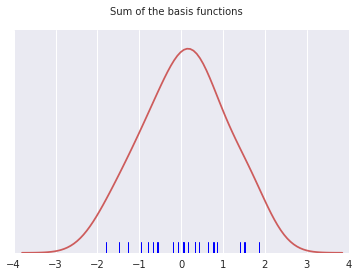

In [16]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig=plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(ds)
plt.yticks([])
plt.suptitle('Sum of the basis functions')

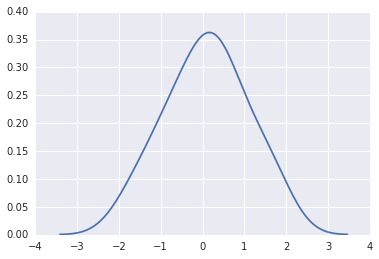

In [17]:
sns.kdeplot(ds)

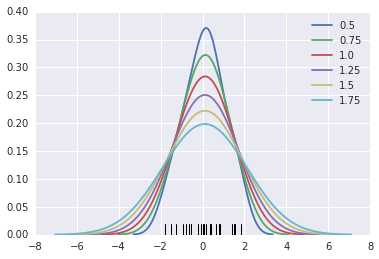

In [18]:
sns.rugplot(ds,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(ds, bw=bw,lw=1.8,label=bw)
    

(array([ 1.,  1.,  1.,  0.,  1.,  1.,  3.,  0.,  1.,  1.,  4.,  2.,  1.,
         1.,  3.,  0.,  0.,  1.,  2.,  1.]),
 array([-1.79989371, -1.61732524, -1.43475676, -1.25218829, -1.06961981,
        -0.88705134, -0.70448286, -0.52191439, -0.33934591, -0.15677744,
         0.02579104,  0.20835952,  0.39092799,  0.57349647,  0.75606494,
         0.93863342,  1.12120189,  1.30377037,  1.48633884,  1.66890732,
         1.85147579]),
 <a list of 20 Patch objects>)

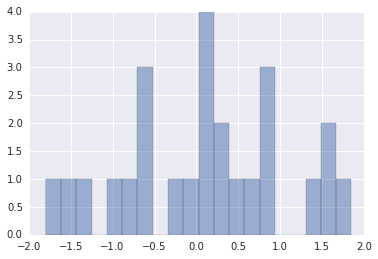

In [14]:
plt.hist(ds,alpha=0.5, bins=20)

In [19]:
url='http://en.wikipedia.org/wiki/Kernel_(statistics)'

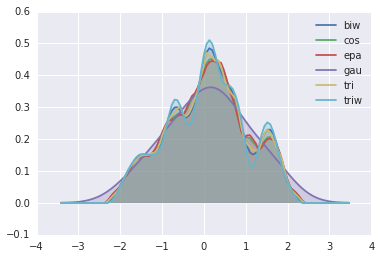

In [21]:
kernel_options=['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(ds, kernel=kern, label=kern, shade=True)

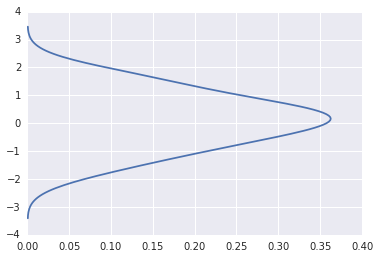

In [22]:
sns.kdeplot(ds,vertical=True)

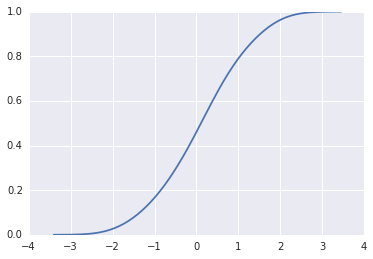

In [24]:
# CDF using seaborn
sns.kdeplot(ds, cumulative=True)

In [25]:
#multivariate density estimation
mean = [0,0]
cov=[[1,0],[0,100]]

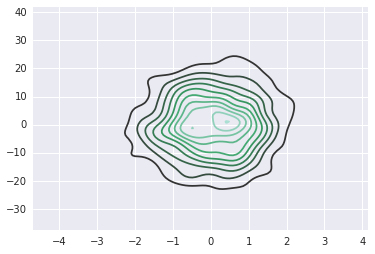

In [26]:
ds2=np.random.multivariate_normal(mean,cov,1000)
df = pd.DataFrame(ds2,columns=['X','Y'])

sns.kdeplot(df)


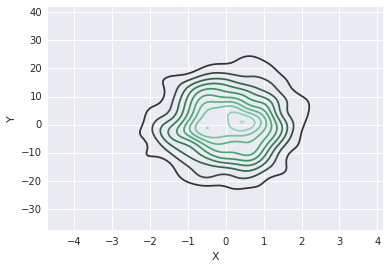

In [27]:
sns.kdeplot(df.X, df.Y)

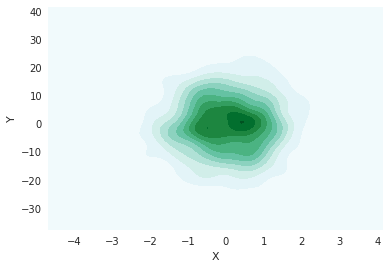

In [28]:
sns.kdeplot(df.X, df.Y,shade=True)

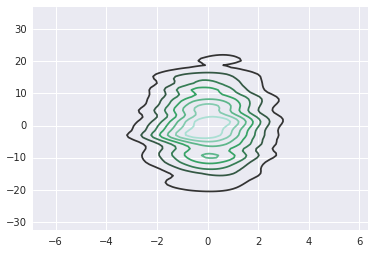

In [29]:
sns.kdeplot(df, bw=1)

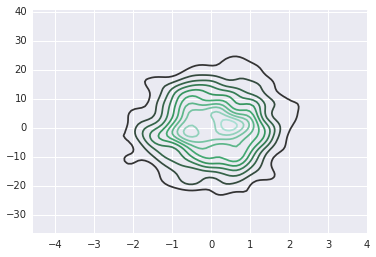

In [30]:
sns.kdeplot(df,bw='silverman')

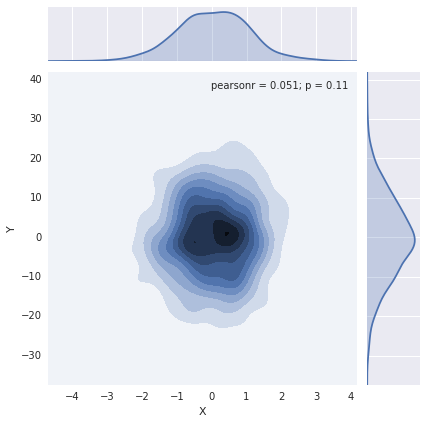

In [31]:
sns.jointplot('X','Y',df,kind='kde')